<a href="https://colab.research.google.com/github/engrarshad/piaic_q2_DeeplearningAssignmentsSolutions/blob/main/PIAIC_Flowers_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment: Flowers Recognition <br>
Dataset Description:<br>

This dataset contains 4242 images of flowers.<br>
The data collection is based on the data flicr, google images, yandex images.<br>
You can use this datastet to recognize plants from the photo.<br>

Attribute Information:<br>
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.<br>
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. <br>
<b>Also explore how to resize images in tensorflow and then resize all the images to a same size. </b> <br>
This is a Multiclass Classification Problem.<br>




WORKFLOW : <br>
Load Data <br>
Split into 60 and 40 ratio.<br>
Encode labels.<br>
Create Model<br>
Compilation Step (Note : Its a Multiclass Classification problem , select loss , metrics according to it)<br>
Train the Model.<br>
If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .<br>
Prediction should be > 85%<br>
Evaluation Step<br>
Prediction<br>




Data : <br>
https://drive.google.com/file/d/1-OX6wn5gA-bJpjPNfSyaYQLz-A-AB_uj/view?usp=sharing

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pandas as pd
import pathlib
from pathlib import Path

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading Data And Defining Features And Labels
directory = Path("/content/drive/MyDrive/AIAssignments/flowers/flowers")

image_names = []
data_images = []
labels = []

# Iterating Over Directory To Extract Sub Directories
for dir in directory.iterdir():
  image_names.append(dir.name)
  print(dir.name)
# Iterating Over Sub Directories To Extract Lables
  for imgpath in dir.iterdir():
    if imgpath.name.endswith("jpg"):
      labels.append(dir.name)
      imgarr = cv2.imread(str(imgpath), cv2.IMREAD_GRAYSCALE)
      imgarr = cv2.resize(imgarr, (320,240))
      data_images.append(imgarr)

dandelion
sunflower
rose
tulip
daisy


In [ ]:
# maping the string label into numeric 
df=pd.DataFrame(labels)
labels=df[0].map({"rose":0,"sunflower":1,"tulip":2,"daisy":3,"dandelion":4})


In [ ]:
# data and label spliting by machine learning libarary
import sklearn
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data_images,labels,test_size=.40,random_state=0)

In [ ]:
#convert data into numpy array and data type float
X_train=np.asarray(X_train).astype("float32")
X_test=np.asarray(X_test).astype("float32")



In [ ]:

# Check the shape of training data,testing data,training labels,testing labels
print(f"shape of training data is :{X_train.shape}\nshape of training label is :{y_train.shape}\nshape of testing data is :{X_test.shape}\nshape of testing label is :{y_test.shape}")

shape of training data is :(2595, 240, 320)
shape of training label is :(2595,)
shape of testing data is :(1730, 240, 320)
shape of testing label is :(1730,)


In [ ]:
#reshaping
X_train=X_train.reshape(2595,320*240)
X_test=X_test.reshape(1730,320*240)



In [ ]:
#check value of train data
X_train[0]

array([  2.,   2.,   2., ..., 144., 138., 136.], dtype=float32)

In [ ]:
#check value of test data
X_test[0]

array([114., 109., 112., ..., 153., 147., 138.], dtype=float32)

In [ ]:
#normalize the data
X_train=X_train/255.0
X_test=X_test/255.0

In [ ]:
 from keras.utils import to_categorical
 y_train=to_categorical(y_train)
 y_test=to_categorical(y_test)

In [ ]:
# importing keras libararies
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.optimizers import Adam, RMSprop

In [ ]:
#model building
network=Sequential()
network.add(Dense(256,activation="relu",input_shape=(X_train.shape[1],)))
network.add(Dropout(0.2))
network.add(Dense(128,activation="relu"))
#network.add(Dropout(0.2))
network.add(Dense(64,activation="relu"))
network.add(Dropout(0.2))
network.add(Dense(5,activation="softmax"))

In [ ]:
#model summary
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               19661056  
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 325       
Total params: 19,702,533
Trainable params: 19,702,533
Non-trainable params: 0
____________________________________________

In [ ]:
# Compilation Step
network.compile(optimizer=RMSprop(0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:

history=network.fit(X_train, y_train,batch_size=20,epochs=100)

Epoch 1/100
130/130 [==============================] - 5s 13ms/step - loss: 2.9717 - accuracy: 0.2288
Epoch 2/100
130/130 [==============================] - 2s 13ms/step - loss: 1.6078 - accuracy: 0.2615
Epoch 3/100
130/130 [==============================] - 2s 13ms/step - loss: 1.5954 - accuracy: 0.2505
Epoch 4/100
130/130 [==============================] - 2s 13ms/step - loss: 1.5744 - accuracy: 0.2537
Epoch 5/100
130/130 [==============================] - 2s 13ms/step - loss: 1.5714 - accuracy: 0.2657
Epoch 6/100
130/130 [==============================] - 2s 12ms/step - loss: 1.5665 - accuracy: 0.2712
Epoch 7/100
130/130 [==============================] - 2s 12ms/step - loss: 1.5450 - accuracy: 0.2811
Epoch 8/100
130/130 [==============================] - 2s 13ms/step - loss: 1.5558 - accuracy: 0.2893
Epoch 9/100
130/130 [==============================] - 2s 13ms/step - loss: 1.5495 - accuracy: 0.3007
Epoch 10/100
130/130 [==============================] - 2s 13ms/step - loss: 1.527

In [ ]:
history_dict = history.history
history_dict.keys()
[u'accuracy', u'loss']

['accuracy', 'loss']

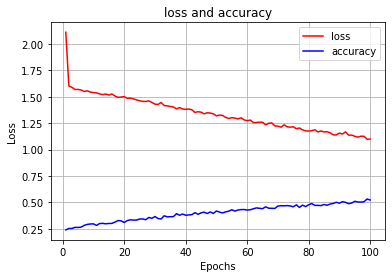

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_accuracy = history_dict['accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)
plt.plot(epochs, loss_values, 'r', label='loss')
plt.plot(epochs, val_accuracy, 'b', label='accuracy')
plt.title('loss and accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [ ]:
network.evaluate(X_test,y_test)

55/55 [==============================] - 0s 6ms/step - loss: 1.7488 - accuracy: 0.2873


[1.7487878799438477, 0.2872832417488098]

In [ ]:
pred = network.predict_classes(X_test[:10])
for i in range(len(pred)):
    print(pred[i],'==>',y_test[i])

2 ==> [0. 1. 0. 0. 0.]
4 ==> [0. 0. 0. 1. 0.]
4 ==> [0. 0. 0. 1. 0.]
0 ==> [0. 0. 1. 0. 0.]
2 ==> [0. 0. 0. 1. 0.]
3 ==> [1. 0. 0. 0. 0.]
4 ==> [0. 0. 0. 0. 1.]
4 ==> [0. 0. 1. 0. 0.]
0 ==> [0. 0. 1. 0. 0.]
0 ==> [0. 0. 1. 0. 0.]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
